# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Gregorius Steven Haryanto
- **Email:** m180d4ky3248@bangkit.academy
- **ID Dicoding:** M180D4KY3248

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend peminjaman sepeda beberapa 2 tahun terakhir?
2. Apakah season dan workingday mempengaruhi jumlah rental sepeda?
3.

## Import Semua Packages/Library yang Digunakan

In [1]:
!gdown https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ &> /dev/null
!unzip Bike-sharing-dataset.zip &> /dev/null
!rm -r Bike-sharing-dataset.zip &> /dev/null

In [2]:
!pip install streamlit &> /dev/null

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
bike_df = pd.read_csv("day.csv", parse_dates=['dteday'], index_col='dteday')
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
bike_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [6]:
columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']

for col in columns:
  bike_df[col] = bike_df[col].astype("category")

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rec_id             731 non-null    int64   
 1   season             731 non-null    category
 2   year               731 non-null    category
 3   month              731 non-null    category
 4   holiday            731 non-null    category
 5   weekday            731 non-null    category
 6   workingday         731 non-null    category
 7   weather_condition  731 non-null    category
 8   temp               731 non-null    float64 
 9   atemp              731 non-null    float64 
 10  humidity           731 non-null    float64 
 11  windspeed          731 non-null    float64 
 12  casual             731 non-null    int64   
 13  registered         731 non-null    int64   
 14  total_count        731 non-null    int64   
dtypes: category(7), float64(4), int64(4)
m

In [8]:
bike_df.isna().sum()

rec_id               0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [9]:
bike_df.duplicated().sum()

0

### Cleaning Data

In [10]:
bike_df.isna().sum()

rec_id               0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

### Menjawab Pertanyaan 1:
Melakukan resample data menjadi per bulan dan menghutung mean setiap bulan.

In [30]:
total_df = bike_df[['total_count']]
total_df = total_df.resample('M').mean()

### Menjawab Pertanyaan 2:
Menggambarkan jumlah peminjaman sepeda di hari libur pada setiap season.

In [28]:
weather_df = bike_df.groupby(by=['season', 'holiday']).agg({
    "total_count":"sum",
})
weather_df

total_count
season holiday             
1      0             459533
       1              11815
2      0             898952
       1              19637
3      0            1038298
       1              22831
4      0             817461
       1              24152

###Menjawab Pertanyaan 3:
Menggambarkan jumlah peminjaman sepeda di hari libur pada setiap bulan.




In [29]:
condition_df = bike_df.groupby(by=['month','holiday']).agg({
    'total_count': 'sum'
})
condition_df

total_count
month holiday             
1     0             129684
      1               5249
2     0             147116
      1               4236
3     0             228920
      1                  0
4     0             259598
      1               9496
5     0             321545
      1              10141
6     0             346342
      1                  0
7     0             331502
      1              13446
8     0             351194
      1                  0
9     0             336606
      1               9385
10    0             311757
      1              10595
11    0             241274
      1              13557
12    0             208706
      1               2330

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend peminjaman sepeda beberapa 2 tahun terakhir.


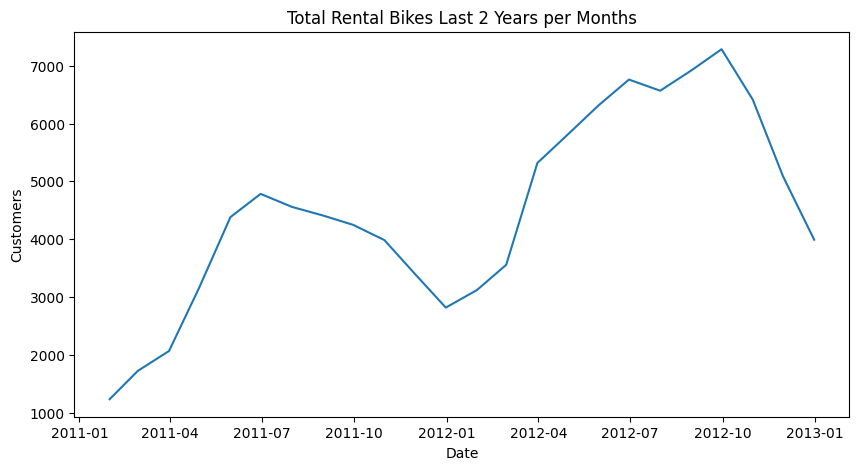

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='dteday', y='total_count', data=total_df, ax=ax)
ax.set_title('Total Rental Bikes Last 2 Years per Months')
ax.set_xlabel("Date")
ax.set_ylabel("Customers")
plt.show()

### Pertanyaan 2: Apakah season dan workingday mempengaruhi jumlah peminjaman sepeda?

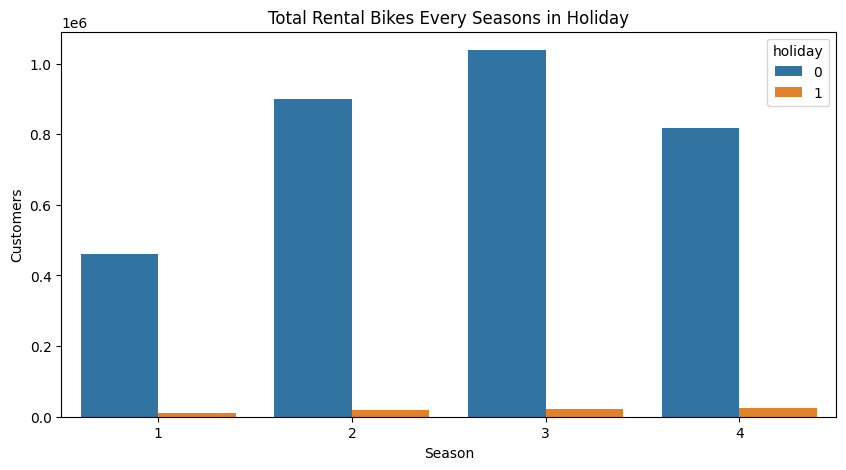

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='season', y='total_count', data=weather_df, hue='holiday', ax=ax)
ax.set_title('Total Rental Bikes Every Seasons in Holiday')
ax.set_xlabel("Season")
ax.set_ylabel("Customers")
plt.show()

### Pertanyaan 3: Apakah working day dan bulan mempengaruhi jumlah rental sepeda?


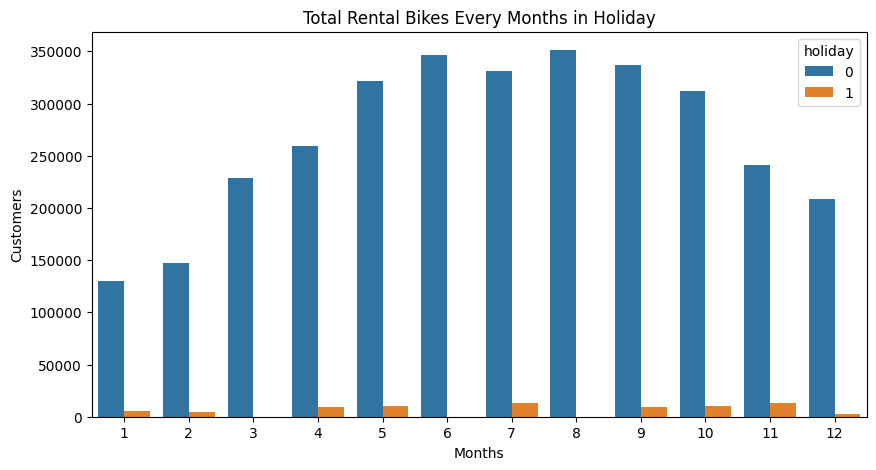

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='month', y='total_count', data=condition_df, hue='holiday', ax=ax)
ax.set_title('Total Rental Bikes Every Months in Holiday')
ax.set_xlabel("Months")
ax.set_ylabel("Customers")
plt.show()

## Conclusion

- Pertanyaan 1:
Jumlah penyewa sepeda setiap tahun memiliki mengalami peningkatan setiap pertengahan hingga akhir tahun. Jumlah peminjaman sepeda tahun 2012 lebih banyak dibandingkan tahun 2011.
- Pertanyaan 2:
Musim (season) mempengaruhi jumlah peminjaman sepeda dengan pinjaman terbesar pada musim gugur (season 3).  Jumlah peminjaman sepeda saat hari libur (holiday) tidak sebanyak jumlah peminjaman sepeda saat hari tidak libur.
- Pertanyaan 3:
Bulan (month) mempengaruhi jumlah peminjaman sepeda dengan peminjaman terbesar saat pertengahan tahun. Jumlah peminjaman sepeda pada hari libur, tidak sebanyak pada hari kerja.
